In [1]:
# En caso de ejecutar en Google Colab, clonar el repositorio:
#!git clone https://github.com/fco-parga/mna_proyecto_integrador_eq09.git

In [2]:
# En caso de ejecutar en Google Colab, instalar requierimientos:
#!pip install -r mna_proyecto_integrador_eq09/requirements.txt -q

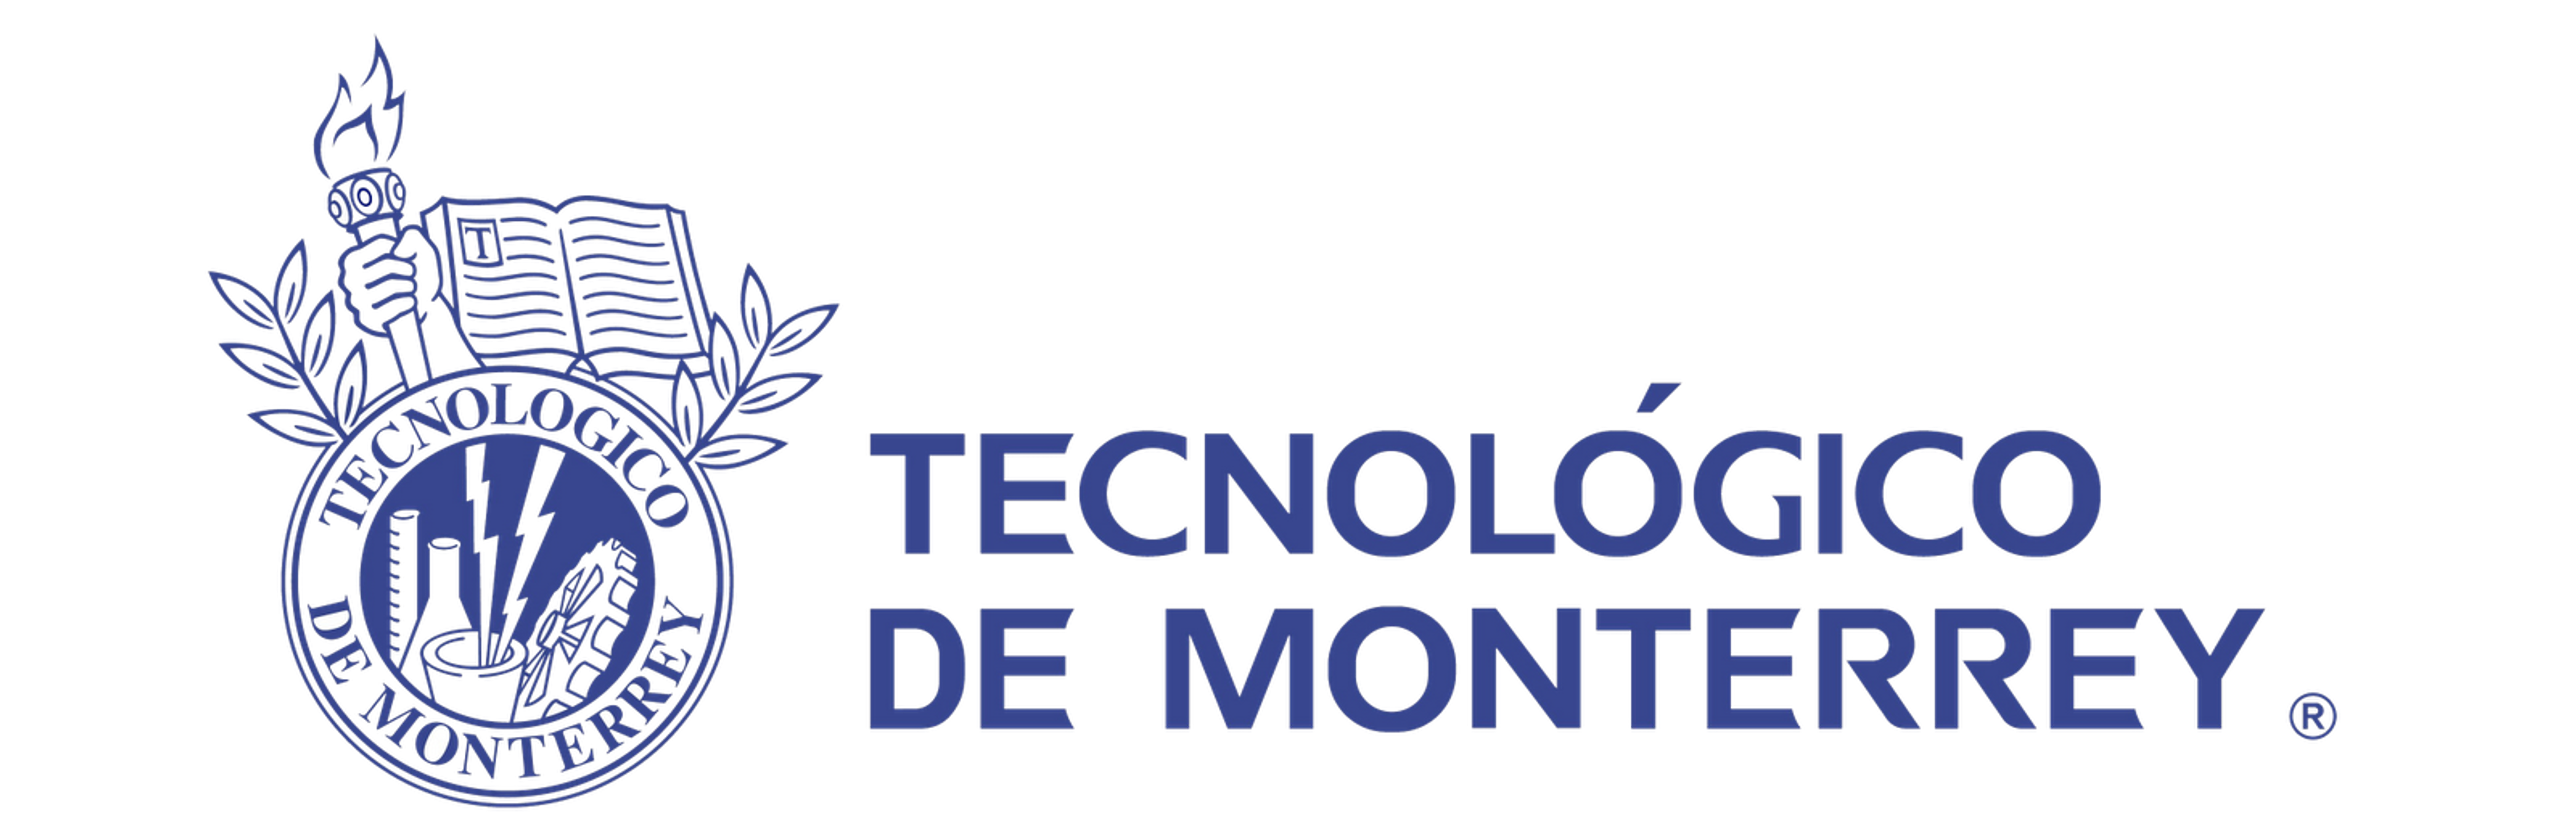

## TC5035 Proyecto integrador
### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso
#### Dr. Luis Eduardo Falcón Morales

___


## Equipo 09

### Segmentación de audiencias y detección de respuesta emocional para anuncios digitales exteriores

Integrantes

> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338
> - Francisco Javier Parga García A01794380

# Avance 4
## Modelos alternativos

- Objetivos

    3.3 Explorar una gama diversa de técnicas y enfoques con el fin de identificar el de mejor desempeño en el conjunto de datos en cuestión.

    3.4 Encontrar la configuración óptima que maximiza el rendimiento del modelo en una tarea específica.

# Reposiotorio
https://github.com/fco-parga/mna_proyecto_integrador_eq09/

>- EDA: https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance1.09.pdf
>- Ingenieria de caracteristicas https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance2.09.pdf
>- Baseline https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance3.09.pdf
>- 

# Folder de librerias

In [3]:
import os
import sys
import time
from pathlib import Path

def add_to_sys_path(project_folder):
    # Get the current working directory
    current_working_dir = os.getcwd()
    
    # Construct the path to the project directory
    project_path = os.path.join(current_working_dir.split(project_folder)[0], project_folder)
    
    # Add the project path to sys.path if it's not already there
    if project_path not in sys.path:
        sys.path.append(project_path)
        print(f"Added {project_path} to sys.path")
    else:
        print(f"{project_path} is already in sys.path")

    os.chdir(project_path)

In [4]:
project_folder_name = "mna_proyecto_integrador_eq09"
add_to_sys_path(project_folder_name)

Added C:\Users\fcopa\OneDrive\Python\mna\mna_proyecto_integrador_eq09 to sys.path


In [5]:
from librerias_integrador.utils import verificar_ambiente

In [6]:
envsys = verificar_ambiente()

Estás trabajando en un sistema Windows.


# Carga de datos

Para aumentar nuestra muestra de datos, tomamos fotos históricas del sistema de vigilancia de la cafetería. Con el objetivo de poder contar con más datos y robustecer el análisis para el modelo de inteligencia artificial.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

In [8]:
from librerias_integrador.utils import cargar_y_preparar_dataframe

In [9]:
data_path = 'data/'

In [10]:
# Archivo con conteos iniciales
raw_csv = 'raw/hitorical_30min.csv'
raw_data_file = os.path.join(data_path, raw_csv)
raw_df = cargar_y_preparar_dataframe(raw_data_file)

raw_df.head(5)

,country_code,country_name,city_code,city_name,zip_code,lat,lon,cam_id,cam_name,cam_additional_location_description,add_id,add_name,add_type,people,views,females,males,mode_age,median_age,negative_emotion,positive_emotion,average_emotion_score,cars,weather,sport_event,social_event,extraordinary_event,storage_blob
event_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-25 19:24:21.511896-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 19:24:21.100613-...
2023-04-25 19:54:59.165048-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 19:54:58.584229-...
2023-04-25 20:25:05.386453-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 20:25:05.010663-...
2023-04-25 20:56:02.770007-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 20:56:02.447836-...
2023-04-25 21:26:39.954640-06:00,MX,Mexico,MX-CMX,Mexico City,9460.0,19.36487,-99.13421,1.0,cafe calaverita,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MX/cafe calaverita/2023-04-25 21:26:39.538730-...


## Distribución de conteo

In [11]:
from librerias_integrador.ploteo import plot_df_counts_histogram, plot_df_counts_timeseries

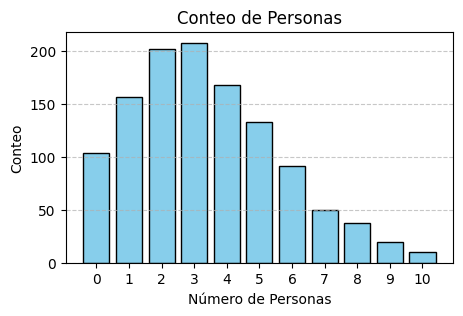

In [12]:
plot_df_counts_histogram(raw_df)

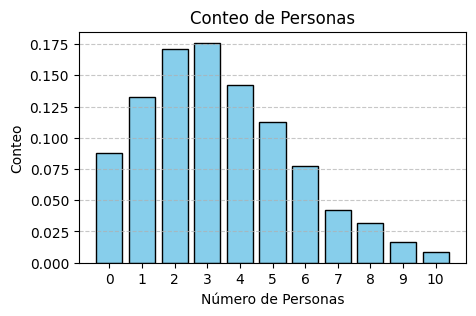

In [13]:
plot_df_counts_histogram(raw_df, normalize=True)

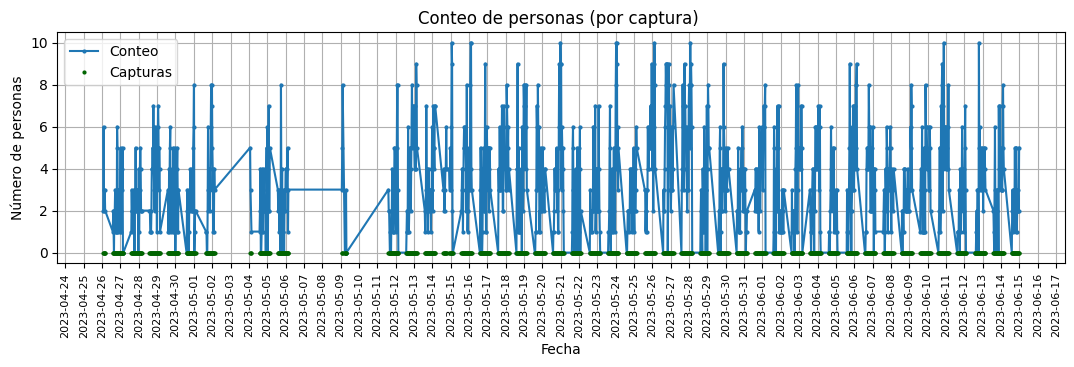

In [14]:
plot_df_counts_timeseries(raw_df, angle=90)

# Agragaciones temporales

In [15]:
grupos_dic = {}
agrupaciones = ['D']

for intervalo in agrupaciones:

    grupos_dic[intervalo] = raw_df.resample(intervalo).agg(
        mean=('people', 'mean'),
        sum=('people', 'sum')
    )

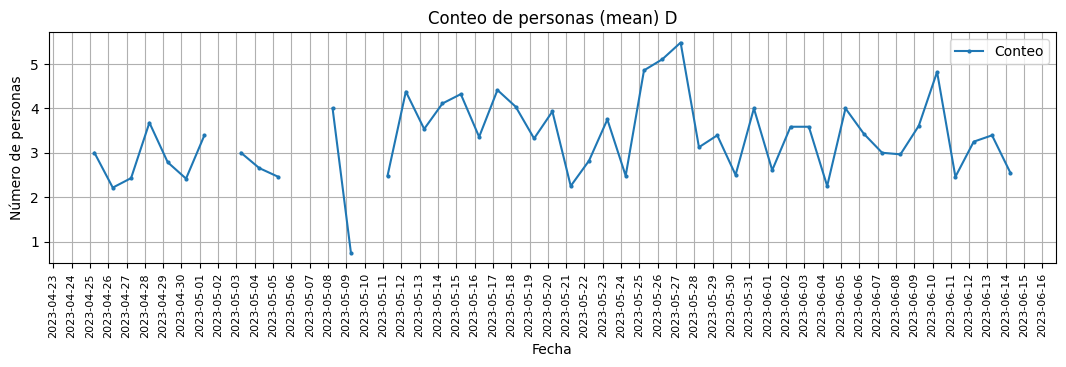

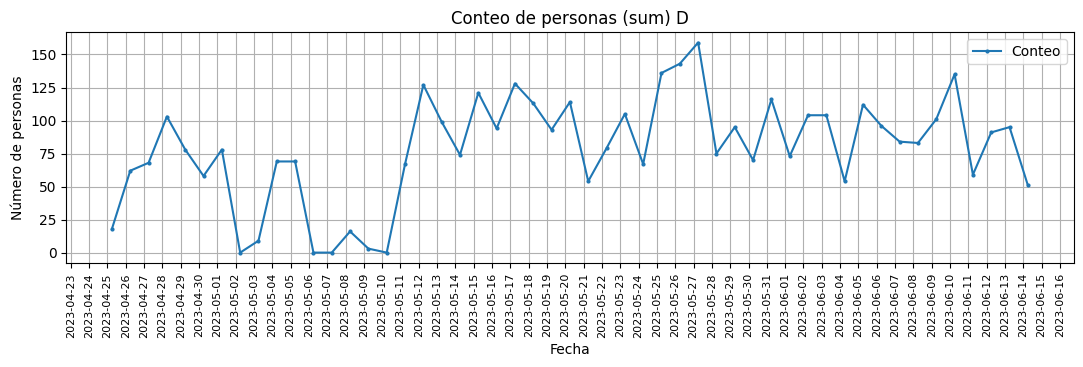

In [16]:
for intervalo in agrupaciones:
    for agg in ['mean','sum']:
        plot_df_counts_timeseries(grupos_dic[intervalo], grouped=True, agg2plot=agg, intervalo=intervalo,angle=90)

La serie de tiempos presentada en el gráfico muestra una variabilidad significativa en el conteo de personas por día, con picos y caídas notables que indican fluctuaciones en la cantidad de personas capturadas. 

El rango de datos va del 25 de abril de 2023 hasta el 14 de junio de 2023, y el número de personas varía de 0 a 150. 

Este comportamiento sugiere que puede haber factores externos o eventos que afectan la presencia de personas en las capturas, resultando en una serie de tiempo con alta variabilidad.

In [17]:
conteo_por_dia = pd.DataFrame(grupos_dic['D']['sum'].value_counts()).reset_index()

# Definimos los rangos
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 'Mayor a 250']

# Creamos una nueva columna 'range' que indica el rango al que pertenece cada 'sum'
conteo_por_dia['range'] = pd.cut(conteo_por_dia['sum'], bins=bins, labels=labels, right=False)

# Agrupamos por la nueva columna 'range' y sumamos los 'count'
conteo_diario_por_rango = conteo_por_dia.groupby('range', observed=False)['count'].sum().reset_index()

conteo_diario_por_rango

,range,count
0,0-50,8
1,51-100,27
2,101-150,15
3,151-200,1
4,201-250,0
5,Mayor a 250,0


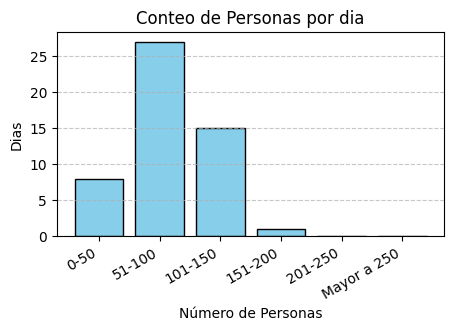

In [18]:
# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(conteo_diario_por_rango['range'], conteo_diario_por_rango['count'], color='skyblue', edgecolor='black', align='center')

# Añadir títulos y etiquetas
plt.title('Conteo de Personas por dia')
plt.xlabel('Número de Personas')
plt.ylabel('Dias')
plt.xticks(range(len(conteo_diario_por_rango)))  # Asegura que el eje x tenga marcas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

# Ingenieria de caracteristicas

La ingeniería de características en series de tiempo es un paso crucial en el análisis y modelado de datos temporales. Se centra en la transformación de datos crudos en formatos que revelen más información y sean más adecuados para algoritmos de aprendizaje automático. Renault et al.(2023) destacan la importancia de la ingeniería de características automática para la clasificación de series de tiempo, demostrando que los métodos basados en características pueden ser tan precisos como los algoritmos de vanguardia. Además, el uso de la Transformada Rápida de Fourier (FFT) como herramienta de ingeniería de características ha demostrado mejorar la precisión y eficiencia de los modelos de pronóstico de series de tiempo.

*Referencias*
> - Galán-Sales, F.J., Reina-Jiménez , P., Carranza-García, M., Luna-Romera, J.M. (2023). An Approach to Enhance Time Series Forecasting by Fast Fourier Transform. In: García Bringas, P., et al. 18th International Conference on Soft Computing Models in Industrial and Environmental Applications (SOCO 2023). SOCO 2023. Lecture Notes in Networks and Systems, vol 749. Springer, Cham. https://doi.org/10.1007/978-3-031-42529-5_25 

> - Renault, A., Bondu, A., Lemaire, V., & Gay, D. (2023, June). Automatic Feature Engineering for Time Series Classification: Evaluation and Discussion. In 2023 International Joint Conference on Neural Networks (IJCNN) (pp. 1-10). IEEE. https://doi.org/10.1109/IJCNN54540.2023.10191074 


In [19]:
from sklearn.linear_model import LinearRegression

from librerias_integrador.features.datetime_feat import create_date_time_features

En este conjunto de datos hemos creado una característica de tendencia utilizando un modelo de regresión lineal, lo que permite capturar la dirección y velocidad del cambio en tus datos a lo largo del tiempo. 

In [20]:
grupos_dic['D']['timestamp'] = pd.to_datetime(grupos_dic['D'].index)
grupos_dic['D']['trend'] = np.arange(len(grupos_dic['D']))

# Ajustar un modelo de regresión lineal para la tendencia
X = grupos_dic['D'][['trend']]  # Característica de tendencia
y = grupos_dic['D']['sum']  # Variable objetivo
model = LinearRegression()
model.fit(X, y)

# Crear características de tendencia
grupos_dic['D']['trend_feature'] = model.predict(X)

Además, hemos extraído características temporales como el año, mes, día y día de la semana, así como un indicador binario para los fines de semana. Estas características pueden ayudar a los modelos a identificar y aprender patrones estacionales y tendencias a lo largo del tiempo, lo que es esencial para tareas como la predicción y clasificación en series de tiempo.

In [21]:
daily_with_features = create_date_time_features(grupos_dic['D'], 'timestamp')[['sum','trend','trend_feature','year','month','day','weekday','is_weekend']]
daily_with_features.head()

,sum,trend,trend_feature,year,month,day,weekday,is_weekend
event_timestamp,,,,,,,,
2023-04-25 00:00:00-06:00,18,0,49.782805,2023,4,25,1,0
2023-04-26 00:00:00-06:00,62,1,50.930317,2023,4,26,2,0
2023-04-27 00:00:00-06:00,68,2,52.077828,2023,4,27,3,0
2023-04-28 00:00:00-06:00,103,3,53.225339,2023,4,28,4,0
2023-04-29 00:00:00-06:00,78,4,54.372851,2023,4,29,5,1


El resultado de la ingeniería de características muestra una combinación de datos numéricos y categóricos que reflejan tanto la tendencia subyacente como los patrones temporales específicos de los datos. La inclusión de estas características enriquecidas puede mejorar significativamente la capacidad de los modelos de aprendizaje automático para hacer predicciones precisas y proporcionar insights valiosos a partir de los datos de series de tiempo.

# Seleccion de datos

In [22]:
features_columns = ['trend_feature','weekday','is_weekend']
X = daily_with_features[features_columns]
y = daily_with_features['sum'].values

print(f'Dias en el dato: {y.shape[0]}')

Dias en el dato: 51


In [23]:
X.head(11)

,trend_feature,weekday,is_weekend
event_timestamp,,,
2023-04-25 00:00:00-06:00,49.782805,1,0
2023-04-26 00:00:00-06:00,50.930317,2,0
2023-04-27 00:00:00-06:00,52.077828,3,0
2023-04-28 00:00:00-06:00,53.225339,4,0
2023-04-29 00:00:00-06:00,54.372851,5,1
2023-04-30 00:00:00-06:00,55.520362,6,1
2023-05-01 00:00:00-06:00,56.667873,0,0
2023-05-02 00:00:00-06:00,57.815385,1,0
2023-05-03 00:00:00-06:00,58.962896,2,0


In [24]:
y[:11]

array([ 18,  62,  68, 103,  78,  58,  78,   0,   9,  69,  69], dtype=int64)

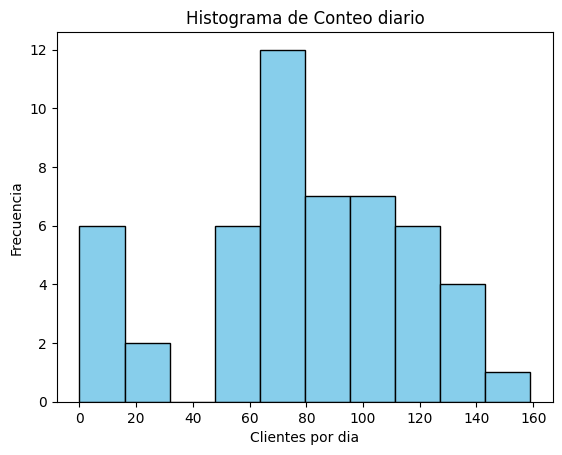

In [25]:
plt.hist(y, bins=10, color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Conteo diario')
plt.xlabel('Clientes por dia')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

# Separacuion de dato

In [26]:
from sklearn.model_selection import train_test_split
random_state = 13

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print(f'Entrenamiento: {y_train.shape[0]},\nValidacion: {y_test.shape[0]}')

Entrenamiento: 35,
Validacion: 16


# Modelo Dummy

In [28]:
from librerias_integrador.models.dummy import DummyModel

## Entrenamiento (Dummy)

In [29]:
dummy_model = DummyModel()

dummy_model.fit(X_train, y_train)

In [30]:
from librerias_integrador.models.plots import plot_model_predictions


train:
  rmse: 37.7383,   mae: 28.9780,   mape: 0.8990,   r2: 0.0000

test:
  rmse: 43.5958,   mae: 35.4321,   mape: 0.9040,   r2: -0.0026


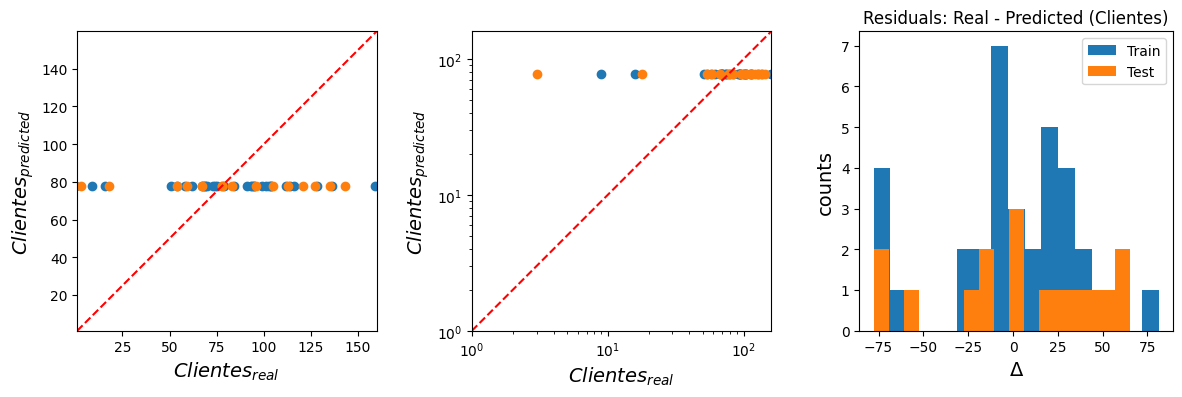

In [31]:
metricas_por_modelo = {}

metricas_por_modelo['dummy'] = plot_model_predictions(dummy_model, X_train, X_test, y_train, y_test, return_metrics=True)

# Modelos alternativos

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

In [33]:
# Diccionario para almacenar las métricas de todos los modelos
model_metrics = {}

# Modelos a evaluar
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Polynomial': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Decision Tree': DecisionTreeRegressor(min_samples_split=3),
    'Neural Network': MLPRegressor(random_state=random_state, max_iter=10000)  # Red neuronal simple
}




 Linear

train:
  rmse: 32.5810,   mae: 25.7497,   mape: 0.8990,   r2: 0.2546

test:
  rmse: 40.8247,   mae: 37.3486,   mape: 0.9040,   r2: 0.1208


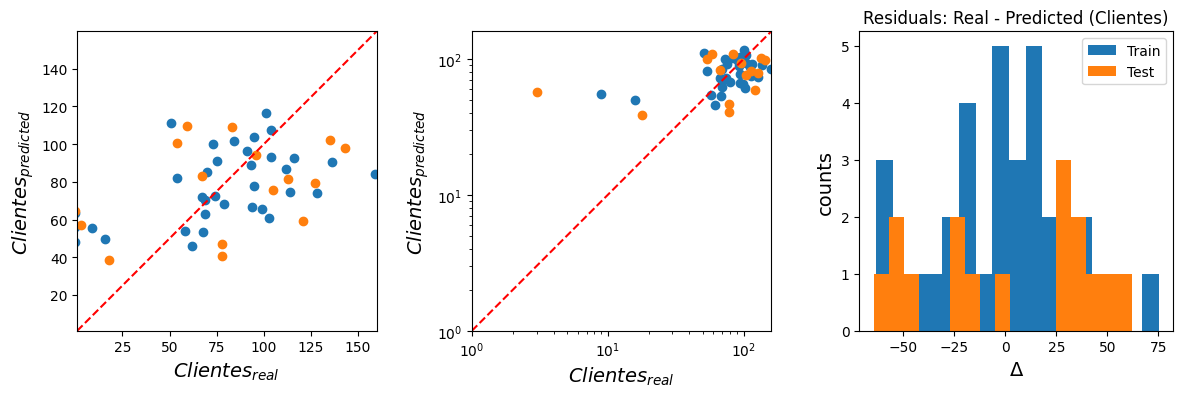




 Ridge

train:
  rmse: 32.6249,   mae: 25.5834,   mape: 0.8990,   r2: 0.2526

test:
  rmse: 40.8778,   mae: 37.2508,   mape: 0.9040,   r2: 0.1185


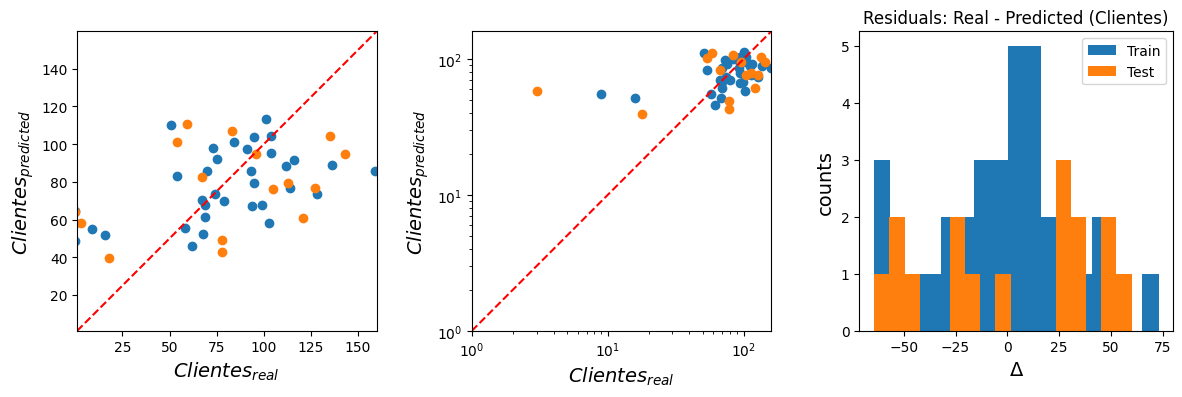




 Lasso

train:
  rmse: 32.8695,   mae: 25.7408,   mape: 0.8990,   r2: 0.2414

test:
  rmse: 41.0237,   mae: 37.0401,   mape: 0.9040,   r2: 0.1122


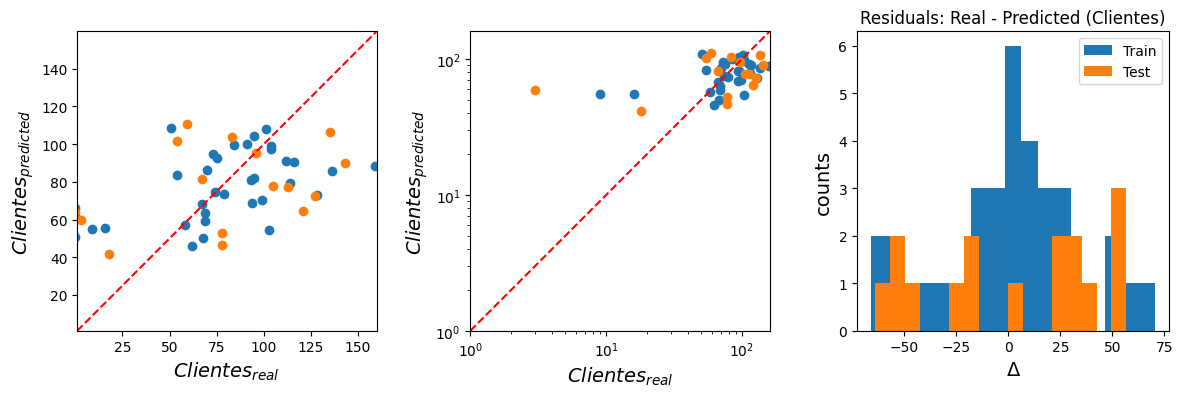




 Polynomial

train:
  rmse: 25.6704,   mae: 22.0004,   mape: 0.8990,   r2: 0.5373

test:
  rmse: 41.8672,   mae: 33.5170,   mape: 0.9040,   r2: 0.0753


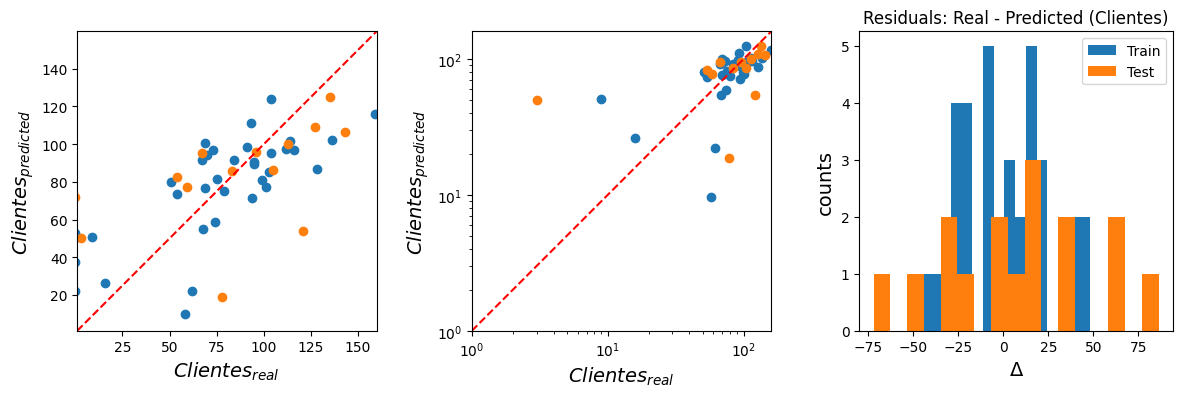




 Decision Tree

train:
  rmse: 4.2812,   mae: 2.5429,   mape: 0.8990,   r2: 0.9871

test:
  rmse: 29.8760,   mae: 24.8438,   mape: 0.9040,   r2: 0.5291


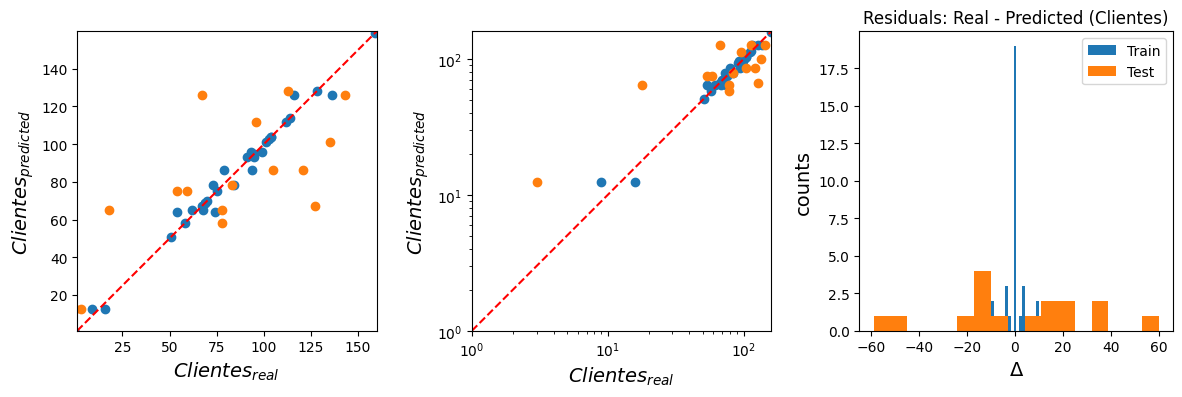




 Neural Network

train:
  rmse: 33.3706,   mae: 25.6403,   mape: 0.8990,   r2: 0.2181

test:
  rmse: 40.8518,   mae: 36.4995,   mape: 0.9040,   r2: 0.1196


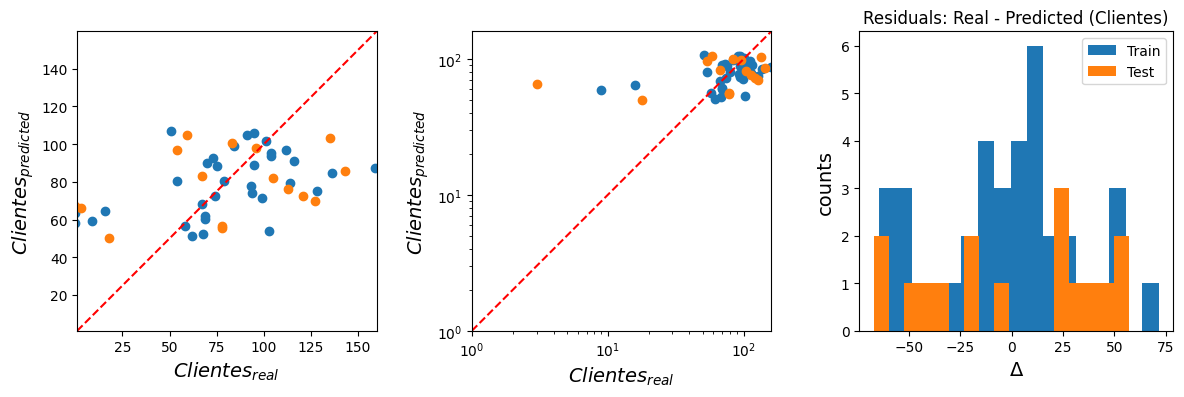

In [34]:
# Entrenamiento y evaluación de modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    print('\n'*3,name)
    metrics = plot_model_predictions(model, X_train, X_test, y_train, y_test, return_metrics=True)
    model_metrics[name] = metrics

In [35]:
# Convertir el diccionario en un DataFrame
metricas_por_modelo_df = pd.DataFrame.from_dict({(i,j): model_metrics[i][j]
                             for i in model_metrics.keys()
                             for j in model_metrics[i].keys()},
                            orient='index')

# Renombrar los índices
metricas_por_modelo_df.index = pd.MultiIndex.from_tuples(metricas_por_modelo_df.index, names=["modelo", "dataset"])
metricas_por_modelo_df

rmse        mae      mape        r2
modelo         dataset                                          
Linear         train    32.581016  25.749747  0.899049  0.254641
               test     40.824687  37.348570  0.903981  0.120789
Ridge          train    32.624928  25.583416  0.899049  0.252631
               test     40.877832  37.250767  0.903981  0.118498
Lasso          train    32.869549  25.740769  0.899049  0.241381
               test     41.023655  37.040077  0.903981  0.112198
Polynomial     train    25.670429  22.000417  0.899049  0.537297
               test     41.867173  33.516952  0.903981  0.075313
Decision Tree  train     4.281188   2.542857  0.899049  0.987130
               test     29.876046  24.843750  0.903981  0.529138
Neural Network train    33.370650  25.640271  0.899049  0.218074
               test     40.851822  36.499490  0.903981  0.119619

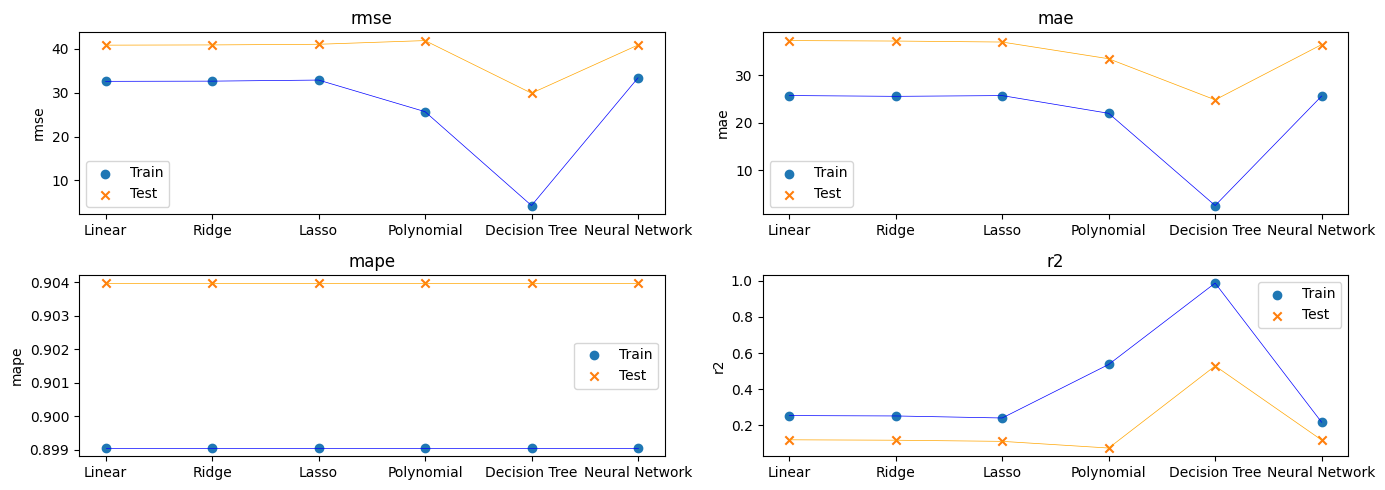

In [36]:
# Crear figuras y ejes para un grid de 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 5))

# Títulos de los gráficos
titles = ['rmse','mae','mape','r2']

# Iterar sobre cada métrica y crear un gráfico para cada una
for i, metric in enumerate(titles):
    ax = axes[i//2, i%2]
    # Filtrar los datos de entrenamiento y prueba para la métrica actual
    train_data = metricas_por_modelo_df.xs('train', level='dataset')[metric]
    test_data = metricas_por_modelo_df.xs('test', level='dataset')[metric]
    
    # Obtener los nombres de los modelos para el eje x
    x_labels = train_data.index
    
    # Crear scatter plot para los datos de entrenamiento y prueba
    ax.scatter(x_labels, train_data, marker='o', label='Train')
    ax.scatter(x_labels, test_data, marker='x', label='Test')
    
    ax.plot(x_labels, train_data, color='blue', linestyle='-', linewidth=0.5)
    ax.plot(x_labels, test_data, color='orange', linestyle='-', linewidth=0.5)
    
    # Establecer el título y las etiquetas
    ax.set_title(metric)
    ax.set_ylabel(metric)
    
    # Añadir leyenda
    ax.legend()

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

# Hiperparametros

In [47]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer

from librerias_integrador.models.metrics import neg_root_mean_squared_error
from librerias_integrador.models.plots import plot_cv_results

In [49]:
alpha_list_size = 29
# Generar una muestra de una distribución lognormal
alpha_list = list(np.round(stats.lognorm.rvs(0.93, size=alpha_list_size)/10,4))

In [62]:
cv_n_splits = 3

param_distributions = {
    'Linear':{'fit_intercept':[True, False]},
    'Ridge': {'alpha': np.logspace(-4, 4, 20)},
    'Lasso': {'alpha': np.logspace(-4, 4, 20)},
    'Decision Tree': {'max_depth': np.arange(1, 20), 'min_samples_leaf': np.arange(1, 20)},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'activation': ['tanh', 'relu'], 'alpha':np.logspace(-4, 0.1, 43).tolist()},
    'Polynomial': {'polynomialfeatures__degree': np.arange(1, 5), 'linearregression__fit_intercept': [True, False]}
}

cv = KFold(n_splits=cv_n_splits, shuffle=True, random_state=random_state)

In [63]:
{model: sum(len(values) for values in params.values()) for model, params in param_distributions.items()}

{'Linear': 2,
 'Ridge': 20,
 'Lasso': 20,
 'Decision Tree': 38,
 'Neural Network': 49,
 'Polynomial': 6}

In [40]:
rmse_scorer = make_scorer(neg_root_mean_squared_error, greater_is_better=True)

Train Median per CV: [(0, -33.1194), (1, -35.1346), (2, -36.7788)]
Test Median per CV: [(0, -39.3696), (1, -36.1724), (2, -33.4239)]


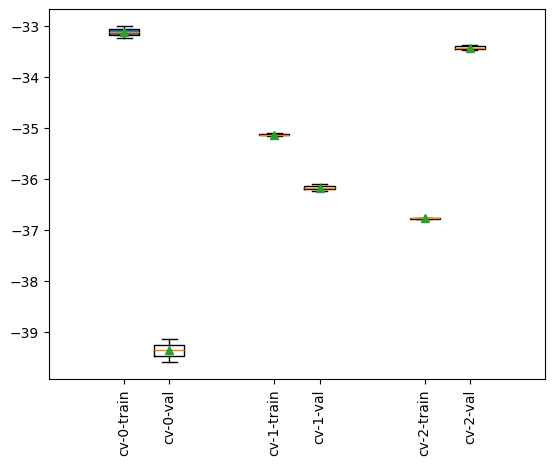

Mejores parámetros para Linear: {'fit_intercept': False}
Train Median per CV: [(0, -33.3284), (1, -35.1912), (2, -37.5862)]
Test Median per CV: [(0, -39.8178), (1, -36.7237), (2, -31.1339)]


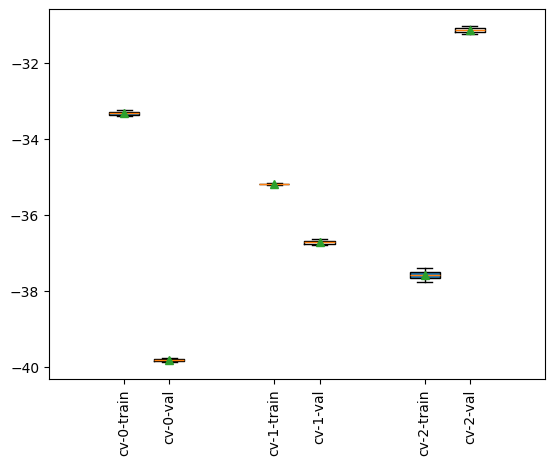

Mejores parámetros para Ridge: {'alpha': 4.281332398719396}
Train Median per CV: [(0, -33.7457), (1, -35.4164), (2, -38.1701)]
Test Median per CV: [(0, -39.7602), (1, -36.7194), (2, -30.9271)]


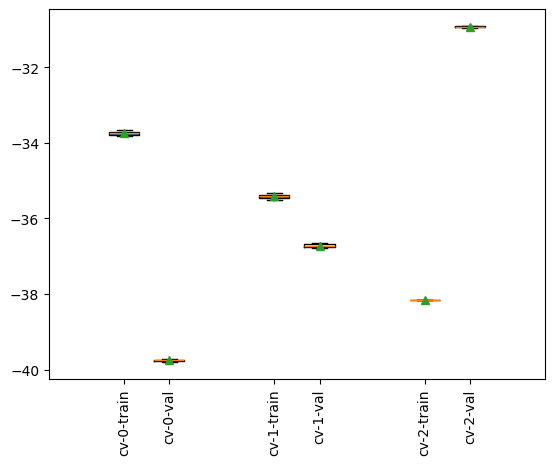

Mejores parámetros para Lasso: {'alpha': 11.288378916846883}
Train Median per CV: [(0, -25.6503), (1, -26.6499), (2, -28.1043)]
Test Median per CV: [(0, -42.7316), (1, -36.649), (2, -33.9886)]


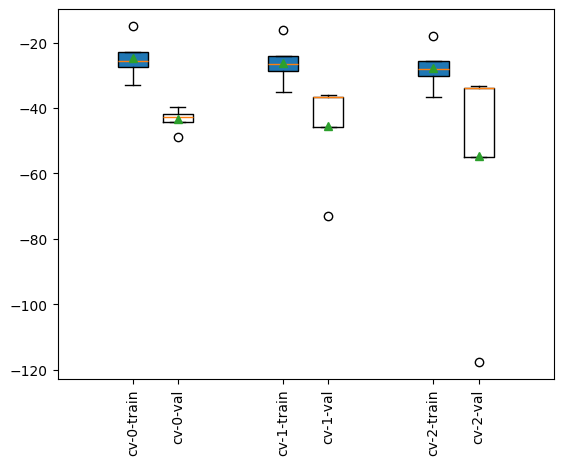

Mejores parámetros para Polynomial: {'polynomialfeatures__degree': 1, 'linearregression__fit_intercept': False}
Train Median per CV: [(0, -27.7602), (1, -26.2339), (2, -25.6468)]
Test Median per CV: [(0, -36.5227), (1, -31.3812), (2, -30.4503)]


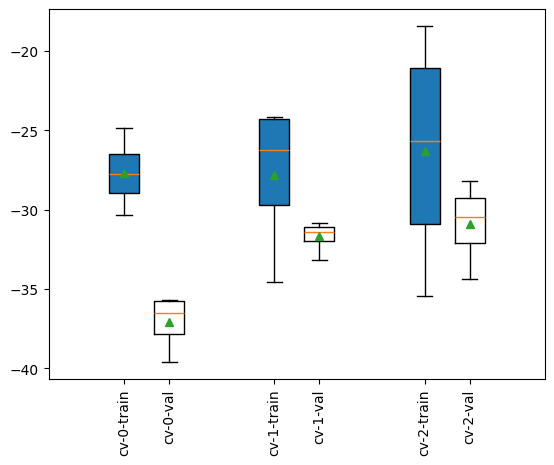

Mejores parámetros para Decision Tree: {'min_samples_leaf': 11, 'max_depth': 12}


C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Median per CV: [(0, -17.8523), (1, -28.1418), (2, -23.605)]
Test Median per CV: [(0, -46.5936), (1, -34.9741), (2, -37.3856)]


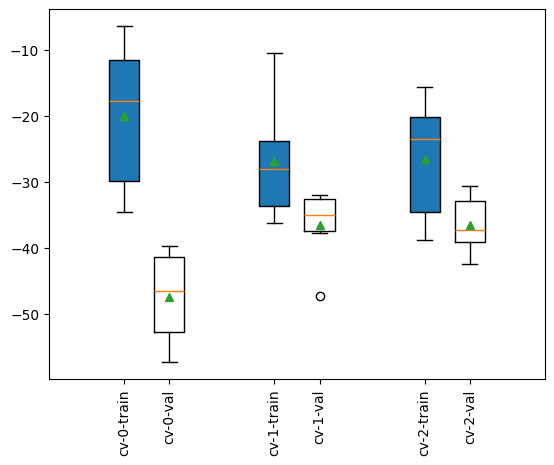

Mejores parámetros para Neural Network: {'hidden_layer_sizes': (100,), 'alpha': 0.8030857221391504, 'activation': 'relu'}


In [64]:
best_regressors = {}

# Realizar RandomizedSearchCV para cada modelo
for model_name, model in models.items():
    parameters = param_distributions[model_name]
    n_iter = min(19, sum(len(values) for values in parameters.items()))
    search = RandomizedSearchCV(model, 
                                parameters, 
                                n_iter=n_iter, cv=cv, 
                                random_state=random_state,
                               return_train_score=True,
                               scoring=rmse_scorer)
    search.fit(X, y)
    
    # Almacenar el mejor regresor en el diccionario
    best_regressors[model_name] = search.best_estimator_
    
    # Usar la función plot_cv_results para visualizar los resultados
    plot_cv_results(search.cv_results_, cv)
    
    # Imprimir los mejores parámetros encontrados
    print(f'Mejores parámetros para {model_name}: {search.best_params_}')

# XGBoost

XGBoost (eXtreme Gradient Boosting) es un sistema de boosting de árboles que se ha convertido en una herramienta popular y poderosa en el campo del aprendizaje automático. Funciona construyendo secuencialmente árboles de decisión, donde cada árbol nuevo intenta corregir los errores cometidos por los árboles anteriores. Específicamente, XGBoost utiliza un enfoque de gradiente para minimizar una función de pérdida, ajustando los árboles de decisión adicionales para mejorar las predicciones.

Las características clave de XGBoost incluyen su capacidad para manejar datos dispersos a través de un algoritmo consciente de la dispersión, y su uso de un boceto cuantil ponderado para el aprendizaje aproximado del árbol, lo que permite un escalado eficiente. Además, proporciona insights sobre patrones de acceso a la caché, compresión de datos y particionamiento para construir un sistema de boosting de árboles escalable. Gracias a estas innovaciones, XGBoost puede manejar miles de millones de ejemplos con menos recursos que los sistemas existentes.

La implementación de la pipeline de XGBoost está diseñada para ser flexible y escalable, lo que permite un fácil ajuste y expansión en el futuro. 

- Preprocesamiento Integrado: La pipeline incluye pasos de preprocesamiento como la codificación de variables categóricas y el escalado de características. Esto asegura que todas las transformaciones necesarias se realicen de manera consistente durante tanto el entrenamiento como las predicciones, lo que es crucial para la integridad del modelo.
- Codificación de Variables Categóricas: Aunque actualmente no hay características categóricas para codificar, la inclusión de un paso de codificación en la pipeline permite la adición fácil de variables categóricas en el futuro. Esto hace que la pipeline sea robusta y adaptable a cambios en los datos de entrada.
- Escalabilidad con GPU: La opción de utilizar la aceleración por GPU con XGBRegressor mejora significativamente la velocidad y el rendimiento del entrenamiento del modelo, especialmente con grandes volúmenes de datos.
- Flexibilidad en Modo de Predicción: El parámetro predict_mode permite ajustar la pipeline para que se utilice específicamente para la predicción, lo que puede implicar diferentes configuraciones o pasos de preprocesamiento.
- Consistencia y Reproducibilidad: El uso de un random_state garantiza que los resultados sean consistentes y reproducibles, lo cual es importante para la validación y comparación de modelos.

Referencia:
>-Tianqi Chen and Carlos Guestrin. 2016. XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '16). Association for Computing Machinery, New York, NY, USA, 785–794. https://doi.org/10.1145/2939672.2939785

In [33]:
class NumpyToCupyTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to convert NumPy arrays to CuPy arrays if CuPy is available.
    Otherwise, it returns the original NumPy array.

    Args:
        X (numpy.ndarray): Input NumPy array.

    Returns:
        numpy.ndarray or cupy.ndarray: Transformed array.
    """
    def fit(self, X, y=None):
        """
        Fit method (no learning required).

        Args:
            X (numpy.ndarray): Input data (ignored).

        Returns:
            self: The fitted transformer instance.
        """
        return self
    
    def transform(self, X):
        """
        Transform method to convert NumPy array to CuPy array (if available).

        Args:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray or cupy.ndarray: Transformed array.
        """
        if cupy_library:
            # Convert the NumPy array to a CuPy array
            return cp.asarray(X)
        else:
            # Return the same NumPy array
            return X

In [34]:
def xgboost_pipeline(X, random_state=None, gpu=True, predict_mode=False):
    """
    Create an XGBoost pipeline for preprocessing data and applying an XGBoost model.

    Args:
        X (pandas.DataFrame): Feature matrix.
        random_state (int, optional): Seed for random number generator.
        gpu (bool, optional): Use GPU acceleration (default is True).
        predict_mode (bool, optional): Whether the pipeline is used for prediction (default is False).

    Returns:
        sklearn.pipeline.Pipeline: XGBoost pipeline.
    """
    total_cols = X.shape[1]
    categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
    numpy2cupy = NumpyToCupyTransformer()

    # Define preprocessing steps
    encoding_step = [
        ('encode_labels', OrdinalEncoder(dtype=int,
                                         handle_unknown='use_encoded_value',
                                         unknown_value=-1,
                                         encoded_missing_value=-2), categorical_columns),
    ]

    scaling_step = [
        ('scaler', RobustScaler(), list(range(total_cols)))  # Apply RobustScaler to all columns
    ]
    encoding = ColumnTransformer(encoding_step, remainder='passthrough')
    scaling = ColumnTransformer(scaling_step, remainder='drop')

    # Define the pipeline to utilize GPU or CPU
    steps = [
        ('encoding', encoding),
        ('scaling', scaling),
        ('numpy2cupy', numpy2cupy)
    ]

    if gpu and not predict_mode:
        # Define the pipeline to utilize GPU
        steps.append(('xgb_model', XGBRegressor(random_state=random_state, device="cuda")))
    else:
        # Define the pipeline for CPU
        steps.append(('xgb_model', XGBRegressor(random_state=random_state)))

    xgb_pipe = Pipeline(steps)

    return xgb_pipe

In [35]:
xgb_pipe = xgboost_pipeline(X, random_state=random_state, gpu=cupy_library)
xgb_pipe

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_labels',
                                                  OrdinalEncoder(dtype=<class 'int'>,
                                                                 encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('scaling',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  [0, 1, 2])])),
                ('numpy2cupy', NumpyToCupyTransformer()),
                ('xgb_mode...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=13, ...))])

In [36]:
cv = KFold(n_splits=cv_n_splits, shuffle=True, random_state=random_state)
alpha_list = list(np.round(stats.lognorm.rvs(0.93, size=alpha_list_size)/10,4))

xgb_scan_parameters = {
    "xgb_model__n_estimators": [5,7,17,23,29,39,47,57,79,91,129,179,279],
    "xgb_model__scale_pos_weight":[0,1,3,5,7,13],
    "xgb_model__subsample":[0.6,0.7,0.8,0.9,1],
    "xgb_model__learning_rate":[0.05, 0.01, 0.1],
    "xgb_model__gamma": alpha_list,
    'xgb_model__lambda': alpha_list,
    "xgb_model__colsample_bytree":[0.7,0.8,0.9,1],
    "xgb_model__colsample_bylevel":[0.7,0.8,0.9,1],
    'xgb_model__max_depth': [5,6,7,8,9,11,13,17,23]
}

print(alpha_list)

[0.018, 0.2161, 0.122, 0.1356, 0.2254, 0.1061, 0.3356, 0.0307, 0.1347, 0.013, 0.0438, 0.026, 0.6715, 0.1262, 0.0299, 0.2584, 0.2081, 0.1355, 0.0615]


In [37]:
xgb_baseline = RandomizedSearchCV(xgb_pipe,
                                  param_distributions=xgb_scan_parameters, 
                                  n_iter=n_iter,
                                  cv=cv,
                                  n_jobs=max_n_jobs,
                                  verbose=verbose, 
                                  scoring=rmse_scorer,#'r2')
                                  return_train_score=True, refit=True)

## Entrenamiento

In [38]:
start_time = time.time()

xgb_baseline.fit(X_train, y_train)
xgb_baseline_fit = xgb_baseline.best_estimator_

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
--- 18.15 Minutes on training time  ---


Train Median per CV: [(0, -17.6587), (1, -15.3456), (2, -14.2067)]
Test Median per CV: [(0, -22.8135), (1, -33.4619), (2, -41.981)]


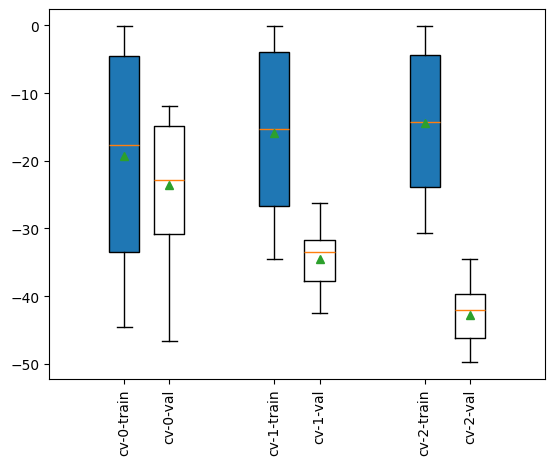

In [39]:
plot_xgb_cv(xgb_baseline.cv_results_, cv_splits=cv)

In [40]:
print("Best parameter (CV score=%0.3f):" % xgb_baseline.best_score_)
print(xgb_baseline.best_params_)

Best parameter (CV score=-29.689):
{'xgb_model__subsample': 0.9, 'xgb_model__scale_pos_weight': 0, 'xgb_model__n_estimators': 39, 'xgb_model__max_depth': 9, 'xgb_model__learning_rate': 0.05, 'xgb_model__lambda': 0.2161, 'xgb_model__gamma': 0.2584, 'xgb_model__colsample_bytree': 0.8, 'xgb_model__colsample_bylevel': 0.8}



train:
  rmse: 14.3774,   mae: 10.5105,   mape: 0.8990,   r2: 0.8549

test:
  rmse: 31.1298,   mae: 27.1968,   mape: 0.9040,   r2: 0.4888


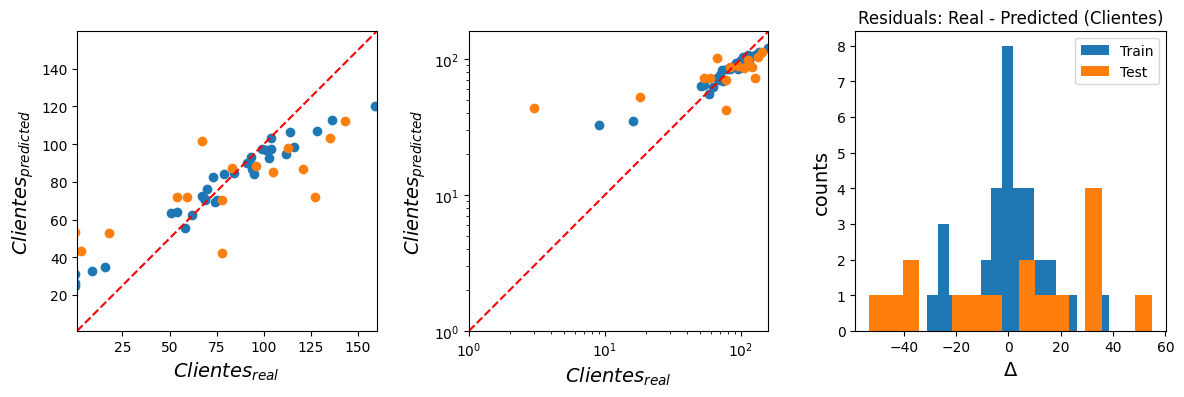

In [41]:
metricas_por_modelo['xgb'] = plot_model_predictions(xgb_baseline_fit, X_train, X_test, y_train, y_test, return_metrics=True)

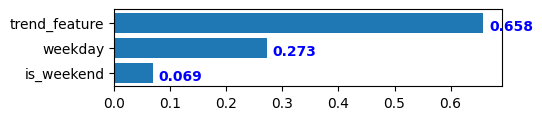

In [42]:
feature_importances = xgb_baseline.best_estimator_.named_steps['xgb_model'].feature_importances_
features_coef = pd.DataFrame(zip(X_train.columns, feature_importances), columns=['feature','coef']).sort_values(by='coef', ascending=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 1))
ax.barh(features_coef['feature'], features_coef['coef'], )

for i, v in enumerate(features_coef['coef'],):
    ax.text(v +.01, i -0.3, str(round(v,3)), color='blue', fontweight='bold')
    
plt.show()

Los **feature importances** obtenidos durante el entrenamiento muestran que:

`trend_feature`: Con una importancia de 0.658, es el predictor más influyente en el modelo. Esto sugiere que la tendencia a lo largo del tiempo es un factor crítico para predecir la variable objetivo.

`weekday`: Con una importancia de 0.273, tiene un impacto moderado en las predicciones del modelo. Indica que el día de la semana tiene cierta relevancia, pero no es tan determinante como la tendencia.

`is_weekend`: Con la menor importancia de 0.069, parece ser el menos influyente de los tres. Esto podría significar que el hecho de que sea fin de semana o no, no afecta tanto la variable objetivo como los otros factores.

Estas importancias reflejan cómo cada característica contribuye al poder predictivo del modelo, siendo la tendencia temporal la más destacada en este caso.

# Deep Learning

La técnica de separar los datos en ventanas que se mueven día a día para crear una matriz, conocida como ventaneo temporal o time windowing, es una práctica común en el análisis de series temporales, especialmente cuando se trabaja con modelos de aprendizaje automático que necesitan capturar dependencias temporales. Algunas razones por las que decidimos utilizar esta metodología:

- Captura de Dependencias Temporales: Al utilizar ventanas de tiempo, el modelo puede aprender cómo las observaciones pasadas influyen en las futuras. Esto es particularmente útil para patrones que dependen del tiempo, como tendencias estacionales o ciclos.
- Estructura de Datos para Modelos de Aprendizaje Automático: Muchos modelos de aprendizaje automático requieren una estructura de datos fija y no pueden manejar directamente secuencias de longitud variable. El ventaneo temporal transforma la serie en un formato que los modelos pueden procesar.
- Inclusión de Características Conocidas: Al incluir características conocidas del día actual en la predicción, el modelo puede utilizar información relevante y actualizada que podría mejorar la precisión de la predicción.
- Flexibilidad y Generalización: Esta técnica permite al modelo ser más flexible y generalizar mejor, ya que no se limita a una observación aislada, sino que considera un contexto más amplio.
 
En resumen, el ventaneo temporal permite que el modelo de aprendizaje automático tenga en cuenta tanto la información histórica como la actual, lo que puede resultar en predicciones más precisas y robustas. Además, prepara el conjunto de datos para ser compatible con una variedad de modelos de aprendizaje automático que pueden requerir una estructura de entrada específica.

Referencia:
>- Ermshaus, A., Schäfer, P., & Leser, U. (2023). Window Size Selection in Unsupervised Time Series Analytics: A Review and Benchmark. In Advanced Analytics and Learning on Temporal Data (AALTD 2022), Lecture Notes in Computer Science (vol. 13812). Springer.

In [43]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [44]:
def create_dataset(X, y, look_back=10):
    """
    Convierte un DataFrame de características y un arreglo de objetivos en tres matrices de dataset.
    
    Args:
        X (pandas.DataFrame): DataFrame de características.
        y (numpy.ndarray): Arreglo de objetivos.
        look_back (int): Número de pasos en el tiempo para mirar hacia atrás para la predicción.
        
    Returns:
        tuple: Tres arreglos de numpy, uno para las características pasadas, uno para las características actuales y otro para los objetivos.
    """
    X_prev_array, X_act_array, y_array = [], [], []
    for i in range(look_back, len(X)):
        # Selecciona las filas del DataFrame para el look_back y los valores previos de y
        a = X.iloc[i-look_back:i].values
        b = y[i-look_back:i]
        # Combina las características con los valores previos de y
        X_prev_array.append(np.column_stack((a, b)))
        # Añade las características actuales sin el valor de y
        X_act_array.append(X.iloc[i].values)
        # Añade el valor correspondiente de y
        y_array.append(y[i])
    return np.array(X_prev_array), np.array(X_act_array), np.array(y_array)

In [45]:
look_back = 10  # Define cuántos pasos en el tiempo tomar hacia atrás (días)
X_prev_array, X_act_array, y_array = create_dataset(X, y, look_back)

In [46]:
print(f'Datos previos:\n {X_prev_array[0]},\nDato actual:\n{X_act_array[0]},\nObjetivo:\n{y_array[0]}')

Datos previos:
 [[ 49.78280543   1.           0.          18.        ]
 [ 50.93031674   2.           0.          62.        ]
 [ 52.07782805   3.           0.          68.        ]
 [ 53.22533937   4.           0.         103.        ]
 [ 54.37285068   5.           1.          78.        ]
 [ 55.52036199   6.           1.          58.        ]
 [ 56.6678733    0.           0.          78.        ]
 [ 57.81538462   1.           0.           0.        ]
 [ 58.96289593   2.           0.           9.        ]
 [ 60.11040724   3.           0.          69.        ]],
Dato actual:
[61.25791855  4.          0.        ],
Objetivo:
69


In [47]:
def reshape_for_scaling(X_3d):
    """
    Reshape a 3D array to 2D for scaling purposes.

    Args:
        X_3d (numpy.ndarray): 3D array with shape (samples, timesteps, features).

    Returns:
        numpy.ndarray: 2D array with shape (samples * timesteps, features).
    """
    n_samples, timesteps, n_features = X_3d.shape
    return X_3d.reshape(n_samples * timesteps, n_features)

def inverse_reshape_for_scaling(X_2d, original_shape):
    """
    Inverse reshape from 2D to 3D after scaling.

    Args:
        X_2d (numpy.ndarray): 2D array with shape (samples * timesteps, features).
        original_shape (tuple): Original shape of the 3D array.

    Returns:
        numpy.ndarray: 3D array with the original shape.
    """
    return X_2d.reshape(original_shape)

In [48]:
def split_time_series_data(X_prev, X_act, y, test_size=0.2, val_size=0.1, random=False, random_state=13):
    """
    Divide los datos de series temporales en conjuntos de entrenamiento, validación y prueba.

    Args:
        X_prev (numpy.ndarray): Arreglo de características pasadas y valores de 'y' previos.
        X_act (numpy.ndarray): Arreglo de características actuales conocidas.
        y (numpy.ndarray): Arreglo de valores objetivo a predecir.
        test_size (float, optional): Proporción del conjunto de datos a incluir en el conjunto de prueba.
        val_size (float, optional): Proporción del conjunto de datos a incluir en el conjunto de validación.
        random (bool, optional): Si es True, divide los datos de forma aleatoria. Si es False, divide los datos de forma secuencial.

    Returns:
        tuple: Seis arreglos que contienen los datos de entrenamiento, validación y prueba para X_prev, X_act y y.
    """
    if random:
        # Dividir los datos de forma aleatoria
        X_prev_train, X_prev_temp, \
        X_act_train, X_act_temp, \
        y_train, y_temp = train_test_split(X_prev, X_act, y, test_size=(test_size + val_size), random_state=random_state)
        
        val_size_adjusted = val_size / (test_size + val_size)
        X_prev_val, X_prev_test, \
        X_act_val, X_act_test, \
        y_val, y_test = train_test_split(X_prev_temp, X_act_temp, y_temp, test_size=val_size_adjusted, random_state=random_state)
    else:
        # Dividir los datos de forma secuencial
        total_size = len(y)
        test_index = int(total_size * (1 - test_size))
        val_index = int(test_index * (1 - val_size))

        X_prev_train, X_prev_val, X_prev_test = X_prev[:val_index], X_prev[val_index:test_index], X_prev[test_index:]
        X_act_train, X_act_val, X_act_test = X_act[:val_index], X_act[val_index:test_index], X_act[test_index:]
        y_train, y_val, y_test = y[:val_index], y[val_index:test_index], y[test_index:]

    # Escalar las características con RobustScaler
    scaler_X_prev = RobustScaler()

    # Reshape los datos para el ajuste y la transformación
    X_prev_train_2d = reshape_for_scaling(X_prev_train)
    X_prev_train_scaled_2d = scaler_X_prev.fit_transform(X_prev_train_2d)
    
    # Transformar los datos de validación y prueba
    X_prev_val_2d = reshape_for_scaling(X_prev_val)
    X_prev_val_scaled_2d = scaler_X_prev.transform(X_prev_val_2d)
    
    X_prev_test_2d = reshape_for_scaling(X_prev_test)
    X_prev_test_scaled_2d = scaler_X_prev.transform(X_prev_test_2d)
    
    # Inversa del reshape para volver a la forma original en 3D
    X_prev_train_scaled = inverse_reshape_for_scaling(X_prev_train_scaled_2d, X_prev_train.shape)
    X_prev_val_scaled = inverse_reshape_for_scaling(X_prev_val_scaled_2d, X_prev_val.shape)
    X_prev_test_scaled = inverse_reshape_for_scaling(X_prev_test_scaled_2d, X_prev_test.shape)

    scaler_X_act = RobustScaler()
    X_act_train_scaled = scaler_X_act.fit_transform(X_act_train)
    X_act_val_scaled = scaler_X_act.transform(X_act_val)
    X_act_test_scaled = scaler_X_act.transform(X_act_test)

    # Escalar el target con StandardScaler
    scaler_y = MinMaxScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    return (X_prev_train_scaled, X_prev_val_scaled, X_prev_test_scaled,
            X_act_train_scaled, X_act_val_scaled, X_act_test_scaled,
            y_train_scaled, y_val_scaled, y_test_scaled,
            scaler_X_prev, scaler_X_act, scaler_y)

In [49]:
test_size=0.15
val_size=0.1

(X_prev_train_scaled, X_prev_val_scaled, X_prev_test_scaled,
 X_act_train_scaled, X_act_val_scaled, X_act_test_scaled,
 y_train_scaled, y_val_scaled, y_test_scaled,
 scaler_X_prev, scaler_X_act, scaler_y) = split_time_series_data(X_prev_array, X_act_array, y_array, test_size=test_size, val_size=val_size, random=False)

In [50]:
print(f'Entrenamiento: {X_prev_train_scaled.shape[0]}, Validacion: {X_prev_val_scaled.shape[0]}, Test: {X_prev_test_scaled.shape[0]}')

Entrenamiento: 30, Validacion: 4, Test: 7


In [51]:
X_prev_train_scaled[0]

array([[-1.31034483, -0.5       ,  0.        , -0.96610169],
       [-1.24137931, -0.25      ,  0.        , -0.22033898],
       [-1.17241379,  0.        ,  0.        , -0.11864407],
       [-1.10344828,  0.25      ,  0.        ,  0.47457627],
       [-1.03448276,  0.5       ,  1.        ,  0.05084746],
       [-0.96551724,  0.75      ,  1.        , -0.28813559],
       [-0.89655172, -0.75      ,  0.        ,  0.05084746],
       [-0.82758621, -0.5       ,  0.        , -1.27118644],
       [-0.75862069, -0.25      ,  0.        , -1.11864407],
       [-0.68965517,  0.        ,  0.        , -0.10169492]])

In [52]:
y_train_scaled[0]

0.4339622641509434

In [53]:
import matplotlib.image as mpimg
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, BatchNormalization, concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

## Metricas para modelo de aprendizaje profundo

In [54]:
import tensorflow as tf

def masked_rmse(mask_value):
    """
    Calcula el RMSE enmascarado, ignorando los valores específicos.

    Args:
        mask_value: Valor que será ignorado en el objetivo (y_true).

    Returns:
        Función de pérdida que calcula el RMSE enmascarado.
    """
    def loss(y_true, y_pred):
        # Crear una máscara booleana de la misma forma que y_true
        mask = tf.not_equal(y_true, mask_value)
        # Convertir la máscara a float64
        y_true = tf.cast(y_true, tf.double)
        y_pred = tf.cast(y_pred, tf.double)
        mask = tf.cast(mask, tf.double)
        # Calcular el error cuadrado
        sq_error = tf.square(y_true - y_pred)
        # Multiplicar el error cuadrado por la máscara
        masked_sq_error = tf.multiply(sq_error, mask)
        # Calcular la media del error cuadrado enmascarado
        return tf.reduce_mean(masked_sq_error)**0.5
    return loss

def masked_mae(mask_value):
    """
    Calcula el MAE enmascarado, ignorando los valores específicos.

    Args:
        mask_value: Valor que será ignorado en el objetivo (y_true).

    Returns:
        Función de pérdida que calcula el MAE enmascarado.
    """
    def mae(y_true, y_pred):
        # Crear una máscara booleana de la misma forma que y_true
        mask = tf.not_equal(y_true, mask_value)
        # Convertir la máscara a float64
        y_true = tf.cast(y_true, tf.double)
        y_pred = tf.cast(y_pred, tf.double)
        mask = tf.cast(mask, tf.double)
        # Calcular el error absoluto
        abs_error = tf.abs(y_true - y_pred)
        # Multiplicar el error absoluto por la máscara
        masked_abs_error = tf.multiply(abs_error, mask)
        # Calcular la media del error absoluto enmascarado
        return tf.reduce_mean(masked_abs_error)
    return mae

def masked_r2(mask_value):
    """
    Calcula el coeficiente de determinación R2 enmascarado, ignorando los valores específicos.

    Args:
        mask_value: Valor que será ignorado en el objetivo (y_true).

    Returns:
        Función de pérdida que calcula el R2 enmascarado.
    """
    def r2(y_true, y_pred):
        # Crear una máscara booleana de la misma forma que y_true
        mask = tf.not_equal(y_true, mask_value)
        # Convertir la máscara a float64
        mask = tf.cast(mask, tf.double)
        # Convertir y_true y y_pred a float64
        y_true = tf.cast(y_true, tf.double)
        y_pred = tf.cast(y_pred, tf.double)
        # Calcular el error no explicado
        unexplained_error = tf.reduce_sum(tf.square(y_true - y_pred) * mask)
        # Calcular el error total
        total_error = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)) * mask)
        # Calcular el coeficiente R2
        r2 = 1 - unexplained_error / total_error
        return r2
    return r2


In [55]:
from tensorflow.keras.optimizers import Adam, RMSprop

adam_opt = Adam(
            learning_rate=0.0005,
            beta_1=0.95,
            name='Adam',
        )

rms_opt = RMSprop(
    learning_rate=0.0005,
    rho=0.9,
    momentum=0.05,
    name='RMSprop',
)

In [56]:
def build_lstm_model(X_prev_array, X_act_array, y_array, lstm_units=16, dense_units=8):
    """
    Construye un modelo LSTM híbrido con regularización L2 y normalización de batch para predecir series de tiempo.

    Args:
        X_prev_array (numpy.ndarray): Arreglo de características pasadas y valores de 'y' previos.
        X_act_array (numpy.ndarray): Arreglo de características actuales conocidas.
        y_array (numpy.ndarray): Arreglo de valores objetivo a predecir.
        lstm_units (int, optional): Número de unidades en la capa LSTM. Por defecto es 16.
        dense_units (int, optional): Número de unidades en la capa densa. Por defecto es 8.

    Returns:
        keras.models.Model: Modelo LSTM compilado listo para entrenar.
    """
    # Definir la entrada de la secuencia pasada
    past_sequence_input = Input(shape=(X_prev_array.shape[1], X_prev_array.shape[2]), name='Historical_data')
    # Normalizar la entrada de la secuencia pasada
    normalized_past_sequence = BatchNormalization()(past_sequence_input)

    # Definir la entrada de las características actuales
    current_features_input = Input(shape=(X_act_array.shape[1],), name='Current_data')
    # Normalizar la entrada de las características actuales
    normalized_current_features = BatchNormalization()(current_features_input)

    # Parte LSTM para procesar la secuencia pasada con regularización L2
    lstm_out = LSTM(units=lstm_units, activation='tanh', kernel_regularizer=l2(0.1), name='LSTM')(normalized_past_sequence)

    # Parte densa para procesar las características actuales con regularización L2
    dense_out = Dense(units=dense_units, activation='relu', kernel_regularizer=l2(0.01), name='FullyConnected')(normalized_current_features)

    # Concatenar las salidas de las dos partes
    merged = concatenate([lstm_out, dense_out], name='Concat')

    # Capa densa adicional antes de la predicción para reducir gradualmente el número de neuronas
    intermediate_dense = Dense(units=dense_units, activation='relu', kernel_regularizer=l2(0.01), name='Reduction')(merged)

    # Capa densa final para la predicción
    predictions = Dense(units=1, activation='relu', name='prediction')(intermediate_dense)

    # Crear el modelo
    model = Model(inputs=[past_sequence_input, current_features_input], outputs=predictions)

    return model


def compile_model(model, optimizer='adam', masking_y=-999):
    """
    Compila un modelo de Keras con un optimizador específico y métricas personalizadas que manejan valores enmascarados.

    Args:
        model (keras.Model): El modelo de Keras que se va a compilar.
        optimizer (str, optional): El nombre del optimizador a utilizar. Puede ser 'adam' o 'rms'.
        masking_y (int, optional): El valor utilizado para enmascarar en las métricas. Los valores iguales a masking_y serán ignorados en el cálculo de las métricas.

    Returns:
        keras.Model: El modelo de Keras compilado con el optimizador y las métricas especificadas.
    """
    
    # Selecciona el optimizador basado en el argumento proporcionado
    if optimizer == 'adam':
        optimizer_fun = adam_opt  # adam_opt debe estar definido previamente como el optimizador Adam
    elif optimizer == 'rms':
        optimizer_fun = rms_opt  # rms_opt debe estar definido previamente como el optimizador RMSprop

    # Compila el modelo con la función de pérdida y las métricas que manejan valores enmascarados
    model.compile(
        loss=masked_rmse(masking_y),  # masked_rmse debe ser una función de pérdida personalizada que ignora los valores enmascarados
        optimizer=optimizer_fun,  # Utiliza el optimizador seleccionado
        metrics=[masked_mae(masking_y), masked_r2(masking_y)],  # Lista de métricas personalizadas que también ignoran los valores enmascarados
    )
    
    # Devuelve el modelo compilado
    return model

In [57]:
masking_y = -999

lstm_model = build_lstm_model(X_prev_train_scaled, X_act_train_scaled, y_train_scaled)
lstm_model = compile_model(lstm_model, masking_y=masking_y)
lstm_model.summary()  # Para ver la estructura del modelo

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Historical_data (InputLayer)   [(None, 10, 4)]      0           []                               
                                                                                                  
 Current_data (InputLayer)      [(None, 3)]          0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 10, 4)       16          ['Historical_data[0][0]']        
 alization)                                                                                       
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 3)           12          ['Current_data[0][0]']       

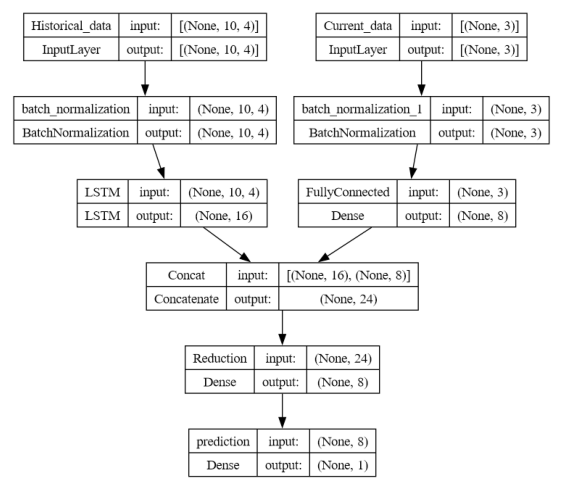

In [58]:
plot_model(lstm_model, to_file='lstm.png', show_shapes=True)

mod_pic=mpimg.imread('lstm.png')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(7,11))
ax.imshow(mod_pic)
ax.axis('off') 
plt.savefig('lstm.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [59]:
epochs=577
batch_size=16
restore_best_weights=True
patience=31
monitor='val_loss'
mode ='min'

es = EarlyStopping(monitor=monitor, 
                   mode=mode, 
                   patience=patience,  
                   restore_best_weights=restore_best_weights,
                   verbose=3)

## Entrenamiento

In [60]:
start_time = time.time()

history_lstm = lstm_model.fit( 
                        [X_prev_train_scaled, X_act_train_scaled],
                        y_train_scaled,
                        validation_data=([X_prev_val_scaled, X_act_val_scaled], y_val_scaled),
                        epochs = epochs,
                        batch_size = batch_size,
                        callbacks = [es],
                        verbose=0
                        )

print("--- %s Minutes on training time  ---" % (round((time.time() - start_time)/60,2)))

--- 0.7 Minutes on training time  ---


In [61]:
def plot_history(history, metrics=('loss', 'mae', 'r2'), max_y_scaler=0.5):
    # Crear subplots para cada métrica
    n_metrics = len(metrics)
    f, axes = plt.subplots(1, n_metrics, figsize=(17, 4))

    for i, metric in enumerate(metrics):
        # Obtener los datos de entrenamiento y validación para la métrica actual
        train_arr = np.array(history[metric])
        val_arr = np.array(history['val_' + metric])

        # Graficar los datos de entrenamiento y validación
        axes[i].plot(train_arr, label='train ' + metric)
        axes[i].plot(val_arr, label='val ' + metric)

        # Establecer los límites del eje y
        if metric in ['loss','mae']:
            min_val = np.column_stack([train_arr, val_arr]).min() * 0.8
            max_val = np.column_stack([train_arr, val_arr]).max() * max_y_scaler
            axes[i].set_ylim(min_val, max_val)
        elif metric == 'r2':
            axes[i].set_ylim(0, 1)

        # Añadir título y leyenda al subplot actual
        axes[i].set_title(metric)
        axes[i].legend()

    # Mostrar la figura con todos los subplots
    plt.show()


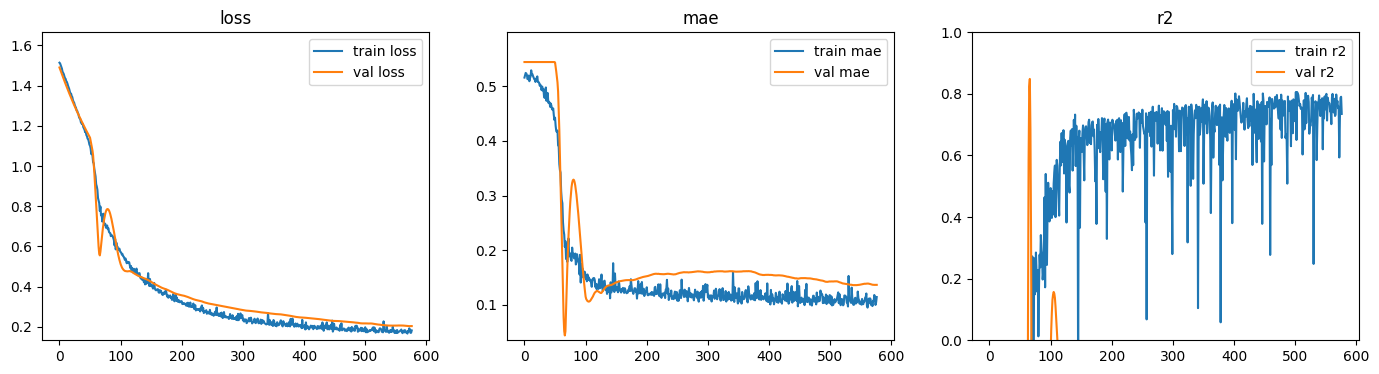

In [62]:
plot_history(history_lstm.history, max_y_scaler=1.1)

1/1 [==============================] - 0s 19ms/step

train:
  rmse: 19.3117,   mae: 15.7420,   mape: 0.8777,   r2: 0.8004

test:
  rmse: 22.1460,   mae: 19.9035,   mape: 0.9875,   r2: 0.2650


C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


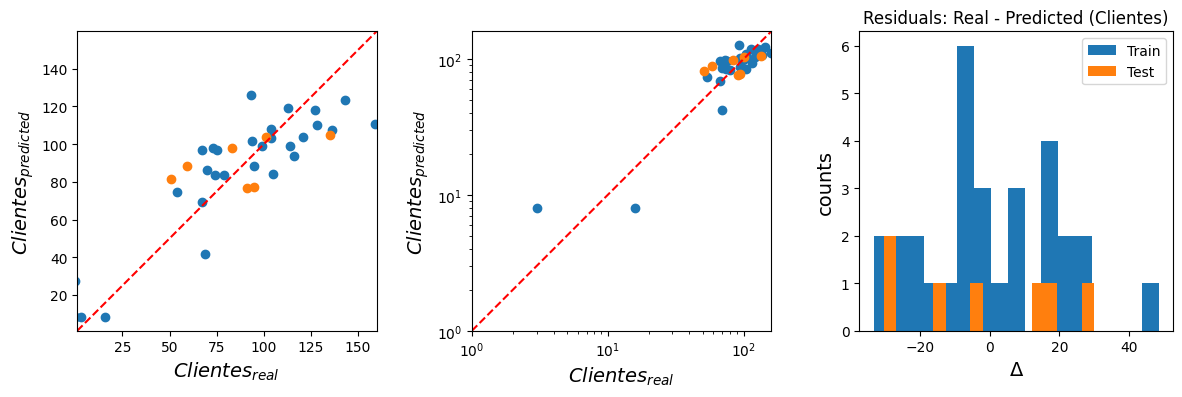

In [63]:
metricas_por_modelo['lstm'] = plot_model_predictions(lstm_model, 
                                                     [X_prev_train_scaled, X_act_train_scaled], 
                                                     [X_prev_test_scaled, X_act_test_scaled],
                                                     y_train_scaled, y_test_scaled, 
                                                     nn_model=True, masking_y=-999, transform_fnc=scaler_y,
                                                     return_metrics=True, batch_size=batch_size)

# Resmen de Modelos

In [64]:
# Convertir el diccionario en un DataFrame
metricas_por_modelo_df = pd.DataFrame.from_dict({(i,j): metricas_por_modelo[i][j]
                             for i in metricas_por_modelo.keys()
                             for j in metricas_por_modelo[i].keys()},
                            orient='index')

# Renombrar los índices
metricas_por_modelo_df.index = pd.MultiIndex.from_tuples(metricas_por_modelo_df.index, names=["modelo", "dataset"])
metricas_por_modelo_df

rmse        mae      mape        r2
modelo dataset                                          
dummy  train    37.738261  28.977959  0.899049  0.000000
       test     43.595774  35.432143  0.903981 -0.002620
xgb    train    14.377375  10.510493  0.899049  0.854857
       test     31.129760  27.196762  0.903981  0.488790
lstm   train    19.311660  15.741991  0.877740  0.800424
       test     22.145975  19.903501  0.987510  0.264994

# Analisis de resultados

Los resultados de entrenamiento de los modelos `dummy`, `xgb` y `lstm` muestran varias tendencias interesantes que reflejan tanto la capacidad de los modelos como el impacto de tener un conjunto de datos limitado. Aquí hay una descripción detallada de las observaciones:

___

### Modelo Dummy:

Este modelo sirve como una línea base simple, ya que predice el promedio del conjunto de datos de entrenamiento.

Los valores de RMSE (Root Mean Square Error) y MAE (Mean Absolute Error) son altos tanto en el conjunto de entrenamiento como en el de prueba, lo que indica que el modelo no se ajusta bien a los datos.

Un valor de R^2 de 0 en el entrenamiento y negativo en la prueba sugiere que el modelo no tiene capacidad predictiva.
___

### Modelo XGB (XGBoost):

Hay una mejora significativa en comparación con el modelo dummy, con valores más bajos de RMSE y MAE, lo que indica un mejor ajuste. Además este modelo es el que tiene las mejores métricas de los 3.

El valor de R^2 es bastante alto en el entrenamiento (0.854), pero cae en la prueba (0.488), lo que puede indicar un sobreajuste.
___

### Modelo LSTM (Long Short-Term Memory):

Este modelo muestra un buen rendimiento en el conjunto de entrenamiento con el RMSE y MAE  y un alto valor de R^2 (0.800).

Sin embargo, en el conjunto de prueba, aunque supera al modelo dummy, su rendimiento disminuye en comparación con el conjunto de entrenamiento, lo que también podría ser un indicio de sobreajuste mucho mayor.
___

## Subentrenamiento y Limitaciones de Datos:

La presencia de subentrenamiento se sugiere por el hecho de que incluso el mejor modelo (XGB) no logra un rendimiento bueno en el conjunto de prueba.

Con solo 51 puntos de datos y una división en conjuntos de entrenamiento, validación y prueba, cada conjunto se vuelve muy pequeño, lo que limita la capacidad de los modelos para aprender patrones complejos y generalizar bien.

La falta de datos puede llevar a una alta varianza en las métricas de rendimiento, haciendo que los modelos sean menos robustos y más susceptibles a las peculiaridades de los datos de entrenamiento específicos.